## Visualising Swiss Energy Data
##### Source: https://www.swissgrid.ch/swissgrid/de/home/experts/topics/energy_data_ch.html

To reproduce: Load all excel files from above link to a "data" directory, possibly via a script.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import statsmodels.api as sm
import statsmodels.graphics as smg

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Load all excel files into one df
Extract the 15min data

In [4]:
def read_excel(filename):
    data = pd.read_excel(io=filename, sheetname="Zeitreihen0h15", header=0, index_col=0)
    data.drop(data.index[0],inplace=True)
    return data

In [3]:
subdir = "data/"
data_list = []
for i in range(2009,2018):
    filename = subdir + "EnergieUebersichtCH_" + str(i) + ".xls"
    print("reading " + filename)
    data_list.append(read_excel(filename))

# merge all into one dataframe
data_full = None
for i in data_list:
    if data_full is None:
        data_full = i
    else:
        data_full = data_full.append(i)

reading data/EnergieUebersichtCH_2009.xls
reading data/EnergieUebersichtCH_2010.xls
reading data/EnergieUebersichtCH_2011.xls
reading data/EnergieUebersichtCH_2012.xls
reading data/EnergieUebersichtCH_2013.xls
reading data/EnergieUebersichtCH_2014.xls
reading data/EnergieUebersichtCH_2015.xls
reading data/EnergieUebersichtCH_2016.xls
reading data/EnergieUebersichtCH_2017.xls


#### Extract outflow, production and consumption data

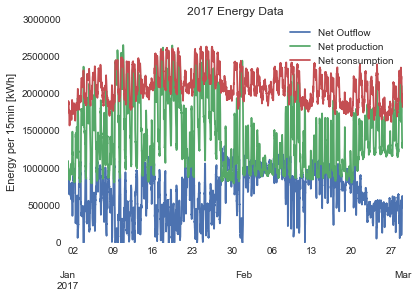

In [5]:
data = data_full[[
        u'Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid',
        u'Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock',
        u'Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock']]
data.columns = ['Net Outflow', 'Net production', 'Net consumption']
ax = data['2017'].plot(title='2017 Energy Data')
ax.set_ylabel('Energy per 15min [kWh]')
plt.show()

###Net consumption
- includes grid losses, powerplants own requirements and energy required to pump water up in pumped storage hydro plants

In [6]:
net_consumption = data['Net consumption']

#####resample data daily


In [7]:
net_consumption_d = net_consumption.resample('D').sum()

##### Seasonality in the data
Remove the yearly seasonality in the data - weakly seasonality remains

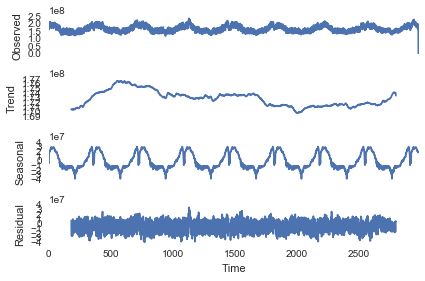

In [8]:
res_year = sm.tsa.seasonal_decompose(net_consumption_d.values, freq=365)
f_year = res_year.plot()

##### Autocorrelation

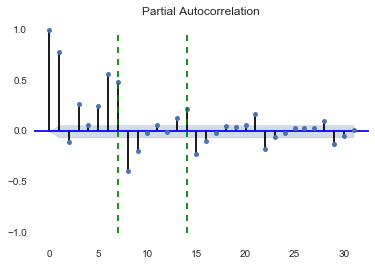

In [9]:
f = smg.tsaplots.plot_pacf(net_consumption_d.values, alpha=0.001, lags=31)
plt.plot((7, 7), (-1, 1), 'g--')
plt.plot((14, 14), (-1, 1), 'g--')
plt.show()

#### Autocorrelation - weekdays
Above autocorrelation is mainly influenced through the weekday/weekend correlation. Remove the weekends for below analysis.

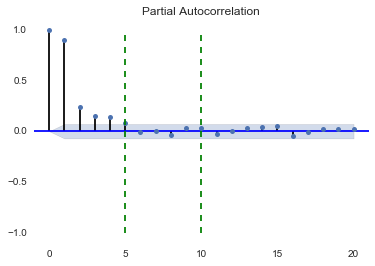

In [177]:
net_consumption_weekdays = net_consumption_d[net_consumption_d.index.dayofweek < 5]
f = smg.tsaplots.plot_pacf(net_consumption_weekdays.values, alpha=0.001, lags=20)
plt.plot((5, 5), (-1, 1), 'g--')
plt.plot((10, 10), (-1, 1), 'g--')
plt.show()